## Ejercicio: Prediccción precio de vivienda utilizando Random Forest Regressor. 

Para este ejercicio trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.

Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable Sale_Price.

En esta ocasión utilizaremos Random Forest Regressor y compararemos los resultados con los obtenidos utilizando Decision Tree Regressor (sesión anterior). Para ello haremos uso de los archivos serializados en la sesión pasada.

### 1. Preparación del ambiente de trabajo.

Importe las librerías clásicas a utilizar.

Para este ejercicio Random Forest de Regresión

De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import median_absolute_error, mean_squared_error

### 2. Importación de archivos serializados.

Importe su modelo entrenado y sus conjuntos de entrenamiento y validación serializados la sesión pasada y reporte las métricas, las que serán utilizadas para comparar el desempeño del modelo anterior (Decision Tree) con el que de desarrollará durante esta actividada (Random Forest).

In [2]:
import pickle
decision_tree=pickle.load(open('jc-gutierrez-best-decision-tree.sav', 'rb'))

In [3]:
decision_tree

DecisionTreeRegressor(criterion='mse', max_depth=5.0, max_features=4,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=9605, splitter='best')

In [4]:
X_train=pickle.load(open('jc-gutierrez-X_train.sav', 'rb'))
X_test=pickle.load(open('jc-gutierrez-X_test.sav', 'rb'))
y_train=pickle.load(open('jc-gutierrez-y_train.sav', 'rb'))
y_test=pickle.load(open('jc-gutierrez-y_test.sav', 'rb'))

In [5]:
mae_tree =median_absolute_error( y_test, decision_tree.predict(X_test)).round(1)
print('MAE Tree: {0}'.format(mae_tree))

MAE Tree: 18901.1


In [6]:
mse_tree =mean_squared_error( y_test, decision_tree.predict(X_test)).round(1)
print('MSE Tree: {0}'.format(mse_tree))

MSE Tree: 1910754897.3


### 3. Estimación utilizando Random Forest.

En base a los conjuntos de entrenamiento serializados, genere un modelo utilizando sklearn.ensemble.RandomForest sin modificar hiperparámetros, sólo declarando la semilla pseudoaleatoria.

Reporte su desempeño y compárelo con su modelo de la sesión pasada.

In [7]:
random_forest = RandomForestRegressor(random_state=9605,n_jobs=-1).fit(X_train, y_train)

In [8]:
mae_rforest =median_absolute_error( y_test, random_forest.predict(X_test)).round(1)
print('MAE Random Forest: {0}'.format(mae_rforest))

MAE Random Forest: 13887.3


In [9]:
varia_mae= ((mae_rforest-mae_tree)/mae_tree*100).round(1)
print('Variación MAE (%): {0}'.format(varia_mae))

Variación MAE (%): -26.5


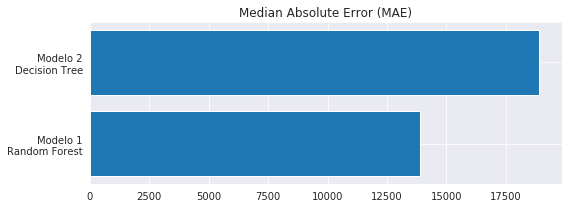

In [10]:
plt.figure(figsize=(8,3))
plt.barh(['Modelo 1\nRandom Forest','Modelo 2\nDecision Tree'],
         [mae_rforest,mae_tree])
plt.title("Median Absolute Error (MAE)")
plt.tight_layout();

In [11]:
mse_rforest =mean_squared_error( y_test, random_forest.predict(X_test)).round(1)
print('MSE Random Forest: {0}'.format(mse_rforest))

MSE Random Forest: 1105127358.9


In [12]:
varia_mse= ((mse_rforest-mse_tree)/mse_tree*100).round(1)
print('Variación MSE (%): {0}'.format(varia_mse))

Variación MSE (%): -42.2


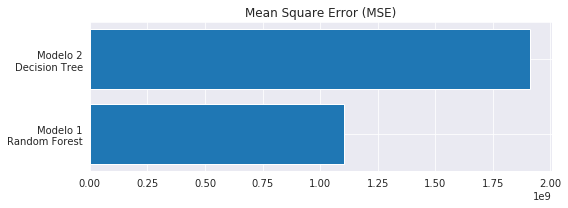

In [13]:
plt.figure(figsize=(8,3))
plt.barh(['Modelo 1\nRandom Forest','Modelo 2\nDecision Tree'],
         [mse_rforest,mse_tree])
plt.title("Mean Square Error (MSE)")
plt.tight_layout();

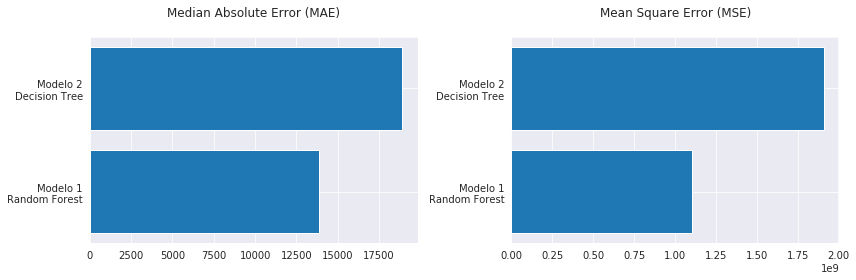

In [14]:
fig, axs = plt.subplots(1, 2);
fig.set_size_inches(12,4)
axs[0].barh(['Modelo 1\nRandom Forest','Modelo 2\nDecision Tree'],[mae_rforest,mae_tree]);
axs[0].set_title('Median Absolute Error (MAE)\n');
axs[1].barh(['Modelo 1\nRandom Forest','Modelo 2\nDecision Tree'],[mse_rforest,mse_tree]);
axs[1].set_title('Mean Square Error (MSE)\n');
plt.tight_layout();

#### Comparación desempeño entre modelos.

El modelo de Random Forest presenta una mejora significativa en el desempeño, tanto para el MAE como para el MSE, al compararlo con el arbol de decisión. En este caso se observa una reducción del MAE de un 26.5% y del MSE en un 42.2%.

### 4. Ajuste de hiperparámetros y cálculo de OOB.

Para afinar el comportamiento de nuestro modelo, evalúe su desempeño los siguientes hiperparámetros:
* max_features : None , log2 , sqrt .
* n_estimators : Evaluar entre 20 y 1000 en pasos de 50.

Guarde la tasa de error en la exactitud medida con OOB.

Grafique el comportamiento.

In [15]:
# Random Forest con hiperparámetros.

tmp_oob_none, tmp_oob_sqrt,tmp_oob_log2 = [], [], []
n_estimators = range(20, 1000, 50)
for i in n_estimators:
    # Implementamos una variante con todos los atributos
    rf_none = RandomForestRegressor(n_estimators= i,
                                    max_features=None,
                                    oob_score=True,
                                    random_state=9605,
                                    n_jobs=-1).fit(X_train, y_train)
    # Implementamos una variante donde los atributos se escogen con sqrt
    rf_sqrt = RandomForestRegressor(n_estimators= i, max_features="sqrt",
                                    warm_start=True,
                                    oob_score=True,
                                    random_state=9605,
                                    n_jobs=-1).fit(X_train, y_train)
    # Implementamos una variante donde los atributos se escogen con log
    rf_log = RandomForestRegressor(n_estimators= i, max_features="log2",
                                   warm_start=True,
                                   oob_score=True,
                                   random_state=9605,
                                   n_jobs=-1).fit(X_train, y_train)
    # Estimamos el error en OOB
    tmp_oob_none.append(rf_none.oob_score_)
    tmp_oob_sqrt.append(rf_sqrt.oob_score_)
    tmp_oob_log2.append(rf_log.oob_score_)
    

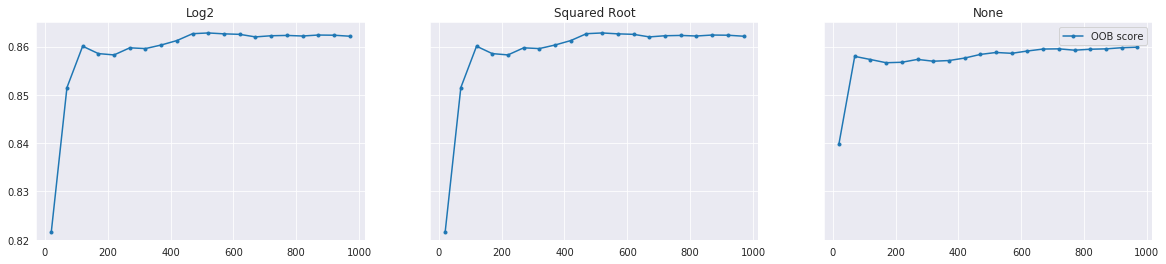

In [16]:
# Gráficos del comportamiento de OBB.

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True);
fig.set_size_inches(20,4)
axs[0].plot(list(n_estimators),tmp_oob_log2, '.-', label='OOB score');
axs[0].set_title('Log2');
axs[1].plot(list(n_estimators),tmp_oob_sqrt,'.-',  label='OOB score');
axs[1].set_title('Squared Root');
axs[2].plot(list(n_estimators),tmp_oob_none, '.-', label='OOB score');
axs[2].set_title('None');
plt.ylim([0.82, 0.865])
plt.legend();

### 5. Refactorización del modelo.

En base a la mejor combinación de hiperparámetros, reentrene el modelo y comente su desempeño.

### Mejor combinación de hiperparámetros.

Observando los gráficos de OBB para los diferentes números de estimadores (n_estimators) y modalidades para definir el máximo de atributos (log2, sqrt, None), se aprecian curvas muy similares entre log2 y sqrt (ello ocurre porque, dado que estamos considerando 10 atributos, log2(10) es equivalente a sqrt(10)).

Para la refactorización del modelo se ocupará max_features=log2

Para la selección del número de estimadores se utilizará el punto máximo de la curva, que se ubica en 920.


In [17]:
random_forest_hiper=RandomForestRegressor(n_estimators= 920, max_features='log2',random_state=9605).fit(X_train, y_train)

In [18]:
mse_rforest_hiper =mean_squared_error( y_test, random_forest_hiper.predict(X_test)).round(1)
print('MSE Random Forest Hiper: {0}'.format(mse_rforest_hiper))

MSE Random Forest Hiper: 1070444493.4


In [19]:
varia_mse= ((mse_rforest_hiper-mse_rforest)/mse_rforest*100).round(1)
print('Variación MSE (%): {0}'.format(varia_mse))

Variación MSE (%): -3.1


In [20]:
mae_rforest_hiper =median_absolute_error( y_test, random_forest_hiper.predict(X_test)).round(1)
print('MAE Random Forest Hiper: {0}'.format(mae_rforest_hiper))

MAE Random Forest Hiper: 12142.4


In [21]:
varia_mae= ((mae_rforest_hiper-mae_rforest)/mae_rforest*100).round(1)
print('Variación MAE (%): {0}'.format(varia_mae))

Variación MAE (%): -12.6


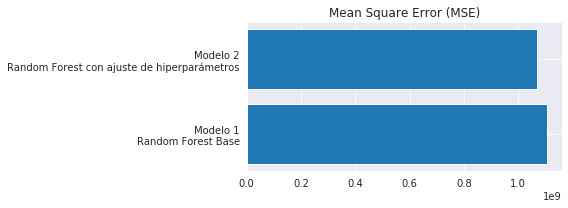

In [22]:
plt.figure(figsize=(8,3))
plt.barh(['Modelo 1\nRandom Forest Base', 'Modelo 2\nRandom Forest con ajuste de hiperparámetros'], [mse_rforest, mse_rforest_hiper])
plt.title("Mean Square Error (MSE)")
plt.tight_layout();

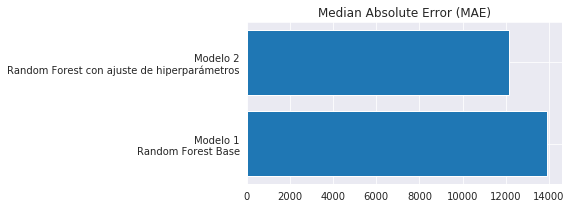

In [23]:
plt.figure(figsize=(8,3))
plt.barh(['Modelo 1\nRandom Forest Base', 'Modelo 2\nRandom Forest con ajuste de hiperparámetros'], [mae_rforest, mae_rforest_hiper])
plt.title("Median Absolute Error (MAE)")
plt.tight_layout();

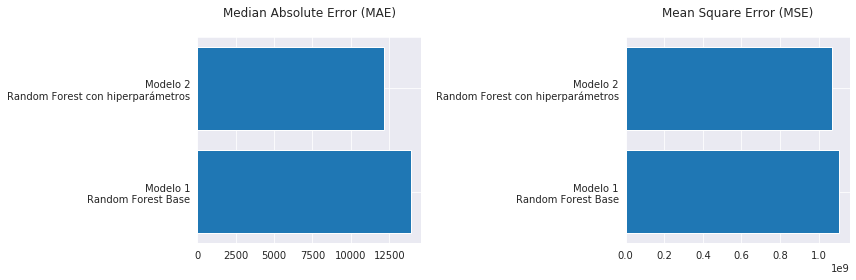

In [24]:
fig, axs = plt.subplots(1, 2);
fig.set_size_inches(12,4)
axs[0].barh(['Modelo 1\nRandom Forest Base', 'Modelo 2\nRandom Forest con hiperparámetros'], [mae_rforest, mae_rforest_hiper]);
axs[0].set_title('Median Absolute Error (MAE)\n');
axs[1].barh(['Modelo 1\nRandom Forest Base', 'Modelo 2\nRandom Forest con hiperparámetros'], [mse_rforest, mse_rforest_hiper]);
axs[1].set_title('Mean Square Error (MSE)\n');
plt.tight_layout();

### Comentarios.

El Random Forest con ajuste de hiperparámetros presenta un mejor desempeño comparado con el modelo de Random Forest sin modificación de hiperparámetros.

En el caso del MSE (mean square error), se observa una disminución de 3.1%, entre ambos modelos. En el caso del MAE (median absolute error) se aprecia una disminución de 12.6%.

### 6. Cálculo de métricas en función del número de estimadores, usando máximo de atributos = log2.

In [25]:
tmp_mse_log2=[]
tmp_mae_log2=[]
for i in n_estimators:
    # Implementamos variante donde los atributos se escogen con log
    rf_log = RandomForestRegressor(n_estimators= i, max_features="log2",
                                   warm_start=True,
                                   random_state=9605,
                                   n_jobs=-1).fit(X_train, y_train)
    # Estimamos MSE
    tmp_mse=mean_squared_error( y_test, rf_log.predict(X_test))
    tmp_mse_log2.append(tmp_mse)
    # Estimamos MAE
    tmp_mae=median_absolute_error( y_test, rf_log.predict(X_test))
    tmp_mae_log2.append(tmp_mae)
    

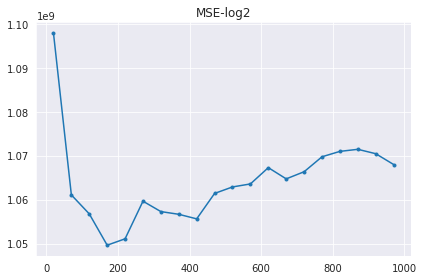

In [26]:
# Gráfico MSE
plt.figure(figsize=(6,4))
plt.plot(list(n_estimators),tmp_mse_log2, '.-')
plt.title("MSE-log2")
plt.tight_layout();

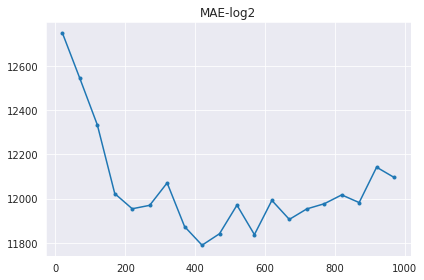

In [27]:
# Gráfico MAE
plt.figure(figsize=(6,4))
plt.plot(list(n_estimators),tmp_mae_log2, '.-')
plt.title("MAE-log2")
plt.tight_layout();